#QUIN F PRACTICE

#### In this Logistic regression case study on bank industy, the goal is to predict the churning customers. Here is a summary of the process involved:

##### Preparation (Domain knowledge):
- Specify the business problem and define the target variable. For example, the business problem could be to identify customers who are likely to churn, and the target variable could be a binary variable indicating whether a customer has churned or not.
- Describe the dataset used, including the number of observations, features, and any missing data. Additionally, explain the significance of each feature in relation to the target variable and the business problem.
##### Data Preprocessing:
- Describe the steps taken to clean and preprocess the data, such as handling missing data, handling outliers, and transforming variables. Additionally, explain the rationale for each step taken.
##### Model Development:
- Explain the process of selecting the variables used in the logistic regression model. This could involve performing feature selection techniques such as backward elimination, forward selection, or stepwise regression.
- Describe the process of training and testing the model, including the evaluation metrics used such as accuracy, precision, recall, and F1 score.
- Explain any hyperparameter tuning done to optimize the model's performance, such as selecting the best regularization parameter.
##### Model Interpretation:
- Describe the coefficients of the logistic regression model and interpret them in relation to the business problem. For example, if a feature has a positive coefficient, it means that an increase in that feature's value increases the odds of churning.
- Explain any insights gained from the logistic regression model, such as which features are most important in predicting customer churn.
##### Conclusion:
- Summarize the results of the logistic regression model, including its accuracy and any insights gained. Additionally, provide recommendations for how the business could use the model to prevent customer churn.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# Impute missing values (example for numerical and categorical)
from sklearn.feature_selection import SelectKBest, f_classif
# s used for feature selection, where it selects features according to the k highest scores 
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


#### About Dataset

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

I got this dataset from a website with the URL as https://leaps.analyttica.com/home. I have been using this for a while to get datasets and accordingly work on them to produce fruitful results. The site explains how to solve a particular business problem.

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.


##### 1. Preparation (Domain knowledge):
- Specify the business problem and define the target variable. For example, the business problem could be to identify customers who are likely to churn, and the target variable could be a binary variable indicating whether a customer has churned or not.
- Identify the dataset and collect the relevant data on bank customers.
- Define the problem statement and set the objective of the project.
- Determine the variables that will be used in the model, such as customer demographics, account history, and transaction data.

##### 2. Understanding of Data (Python + Domain knowledge):
- Describe the dataset used, including the number of observations, features, and any missing data. Additionally, explain the significance of each feature in relation to the target variable and the business problem.
- Perform exploratory data analysis to understand the characteristics of the data.
- Identify the patterns and trends in the data using statistical techniques.
- Determine if there is any missing or incomplete data.

Some ways to exploratory data are given below:

    df.head()
    df.info()
    df.shape
    df.describe()

In [10]:
df = pd.read_csv(r"BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [12]:
print(df.shape) 

(10127, 23)


In [13]:
print(df.describe())

          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%            

##### 3. Data Visualization (Python + Visualization):
- Visualize the data to better understand the patterns and trends.
- Create plots and graphs to help identify relationships between the variables.

Complete tasks below:

    1. Exploring Categorical Features
    2. Exploring Numerical Features
    3. Correlation Heatmap

Some more questions to keep in mind:

    Any missing value?
    Any outliers?
    Balanced or Imbalanced dataset

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
       'Attrition_Flag_Existing Customer', 'Gender_M',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$40K - $6

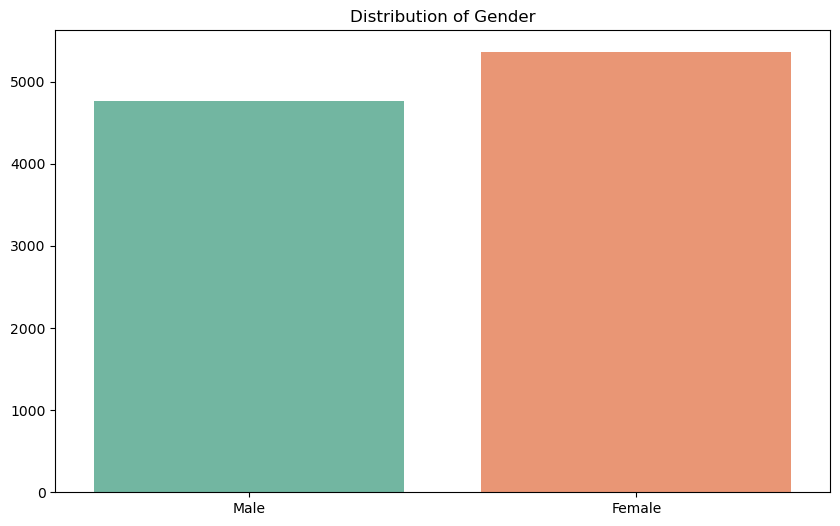

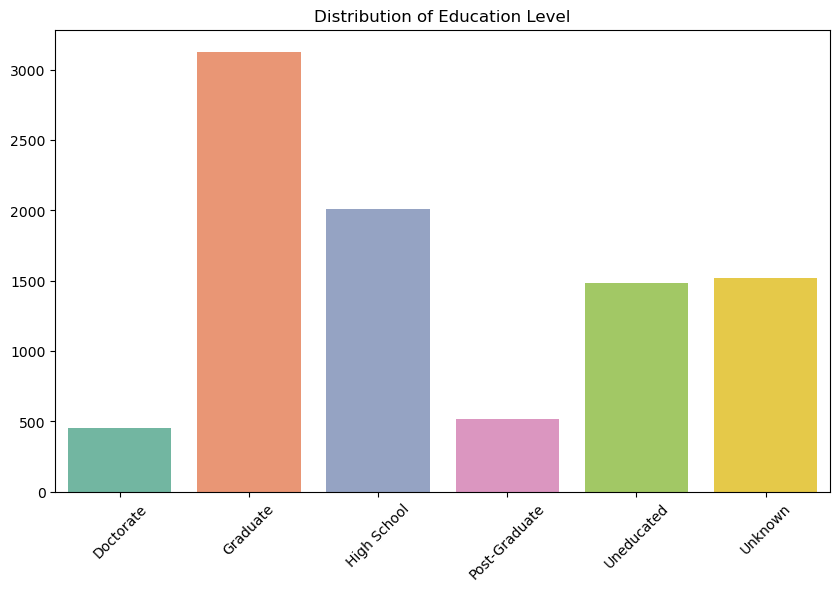

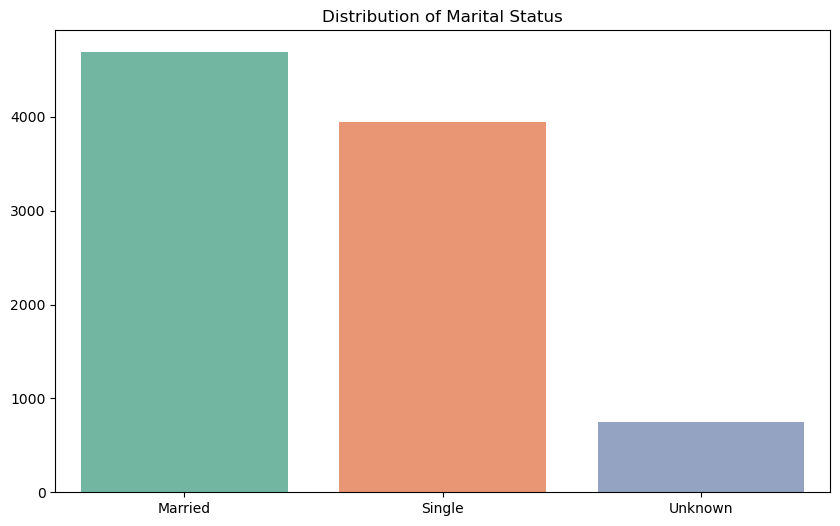

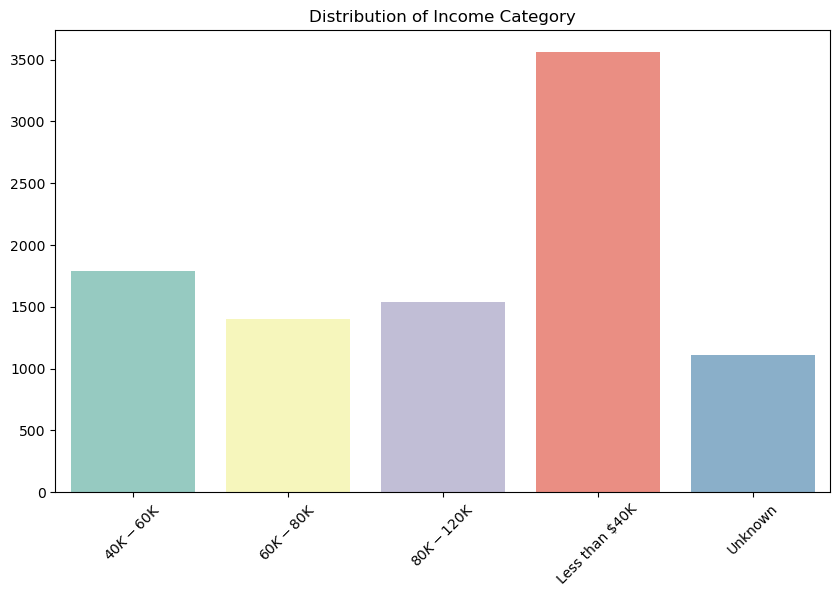

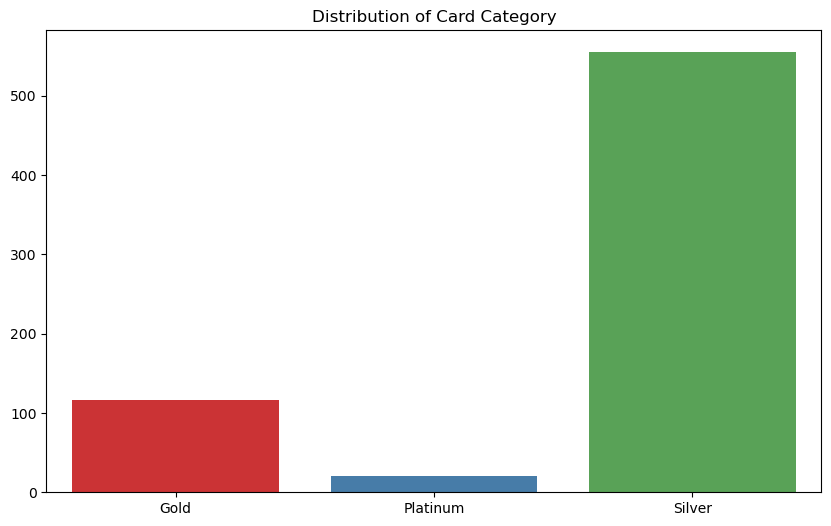

In [45]:


#1. 1. Exploring Categorical Features
# First, print out the column names to verify them
print(df.columns)


# Updated list with actual categorical column names from your dataset
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'] 

# Example for Gender visualization, adapted for one-hot encoded format
gender_counts = pd.Series({
    'Male': df['Gender_M'].sum(),
    'Female': len(df) - df['Gender_M'].sum()
})

plt.figure(figsize=(10, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Set2')
plt.title('Distribution of Gender')
plt.show()

education_levels = {
    'Doctorate': df['Education_Level_Doctorate'].sum(),
    'Graduate': df['Education_Level_Graduate'].sum(),
    'High School': df['Education_Level_High School'].sum(),
    'Post-Graduate': df['Education_Level_Post-Graduate'].sum(),
    'Uneducated': df['Education_Level_Uneducated'].sum(),
    'Unknown': df['Education_Level_Unknown'].sum()
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(education_levels.keys()), y=list(education_levels.values()), palette='Set2')
plt.title('Distribution of Education Level')
plt.xticks(rotation=45)
plt.show()


# Marital Status Visualization
marital_status_counts = {
    'Married': df['Marital_Status_Married'].sum(),
    'Single': df['Marital_Status_Single'].sum(),
    'Unknown': df['Marital_Status_Unknown'].sum()
}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(marital_status_counts.keys()), y=list(marital_status_counts.values()), palette='Set2')
plt.title('Distribution of Marital Status')
plt.show()

# Income Category Visualization
income_category_counts = {
    '$40K - $60K': df['Income_Category_$40K - $60K'].sum(),
    '$60K - $80K': df['Income_Category_$60K - $80K'].sum(),
    '$80K - $120K': df['Income_Category_$80K - $120K'].sum(),
    'Less than $40K': df['Income_Category_Less than $40K'].sum(),
    'Unknown': df['Income_Category_Unknown'].sum()
}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(income_category_counts.keys()), y=list(income_category_counts.values()), palette='Set3')
plt.title('Distribution of Income Category')
plt.xticks(rotation=45)
plt.show()

# Card Category Visualization
card_category_counts = {
    'Gold': df['Card_Category_Gold'].sum(),
    'Platinum': df['Card_Category_Platinum'].sum(),
    'Silver': df['Card_Category_Silver'].sum()
}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(card_category_counts.keys()), y=list(card_category_counts.values()), palette='Set1')
plt.title('Distribution of Card Category')
plt.show()




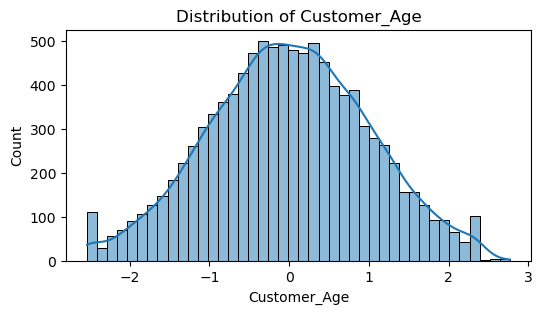

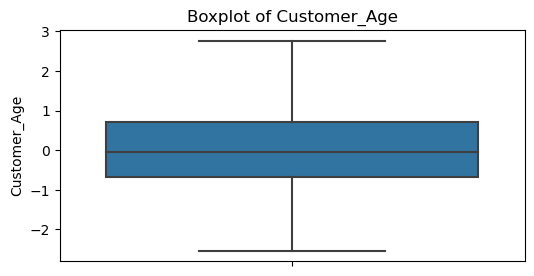

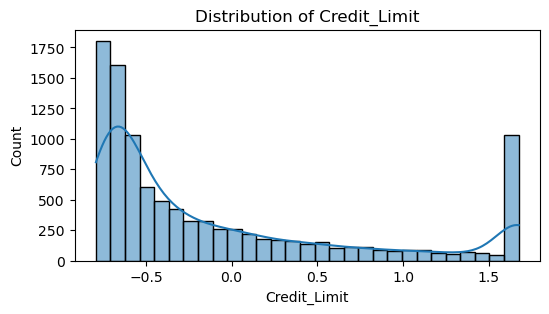

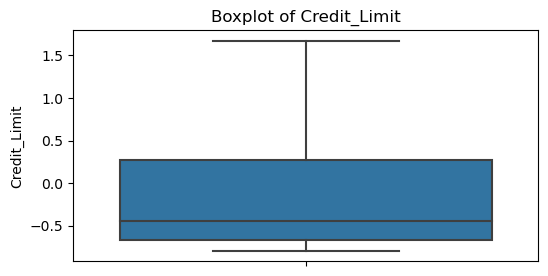

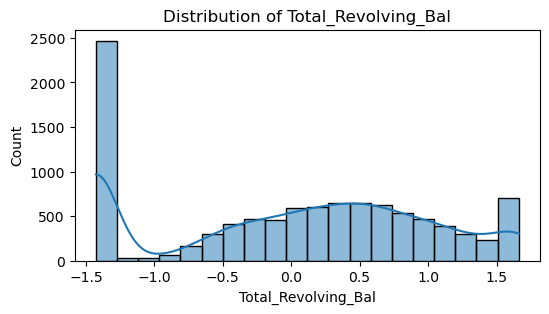

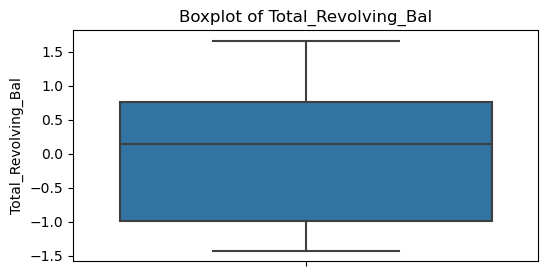

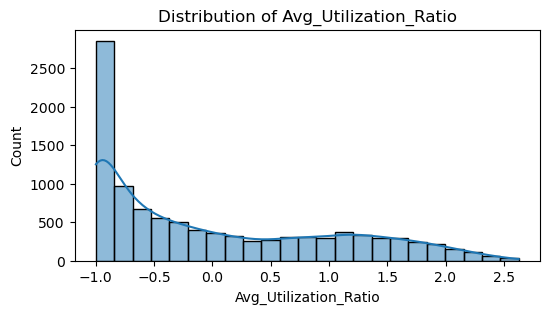

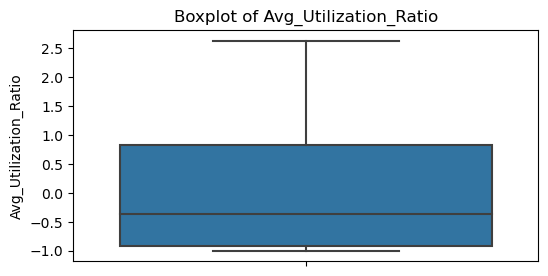

In [41]:
# 2. Exploring Numerical Features


numerical_features = ['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio'] # Update this list as needed

for feature in numerical_features:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()
    
    plt.figure(figsize=(6, 3))
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()



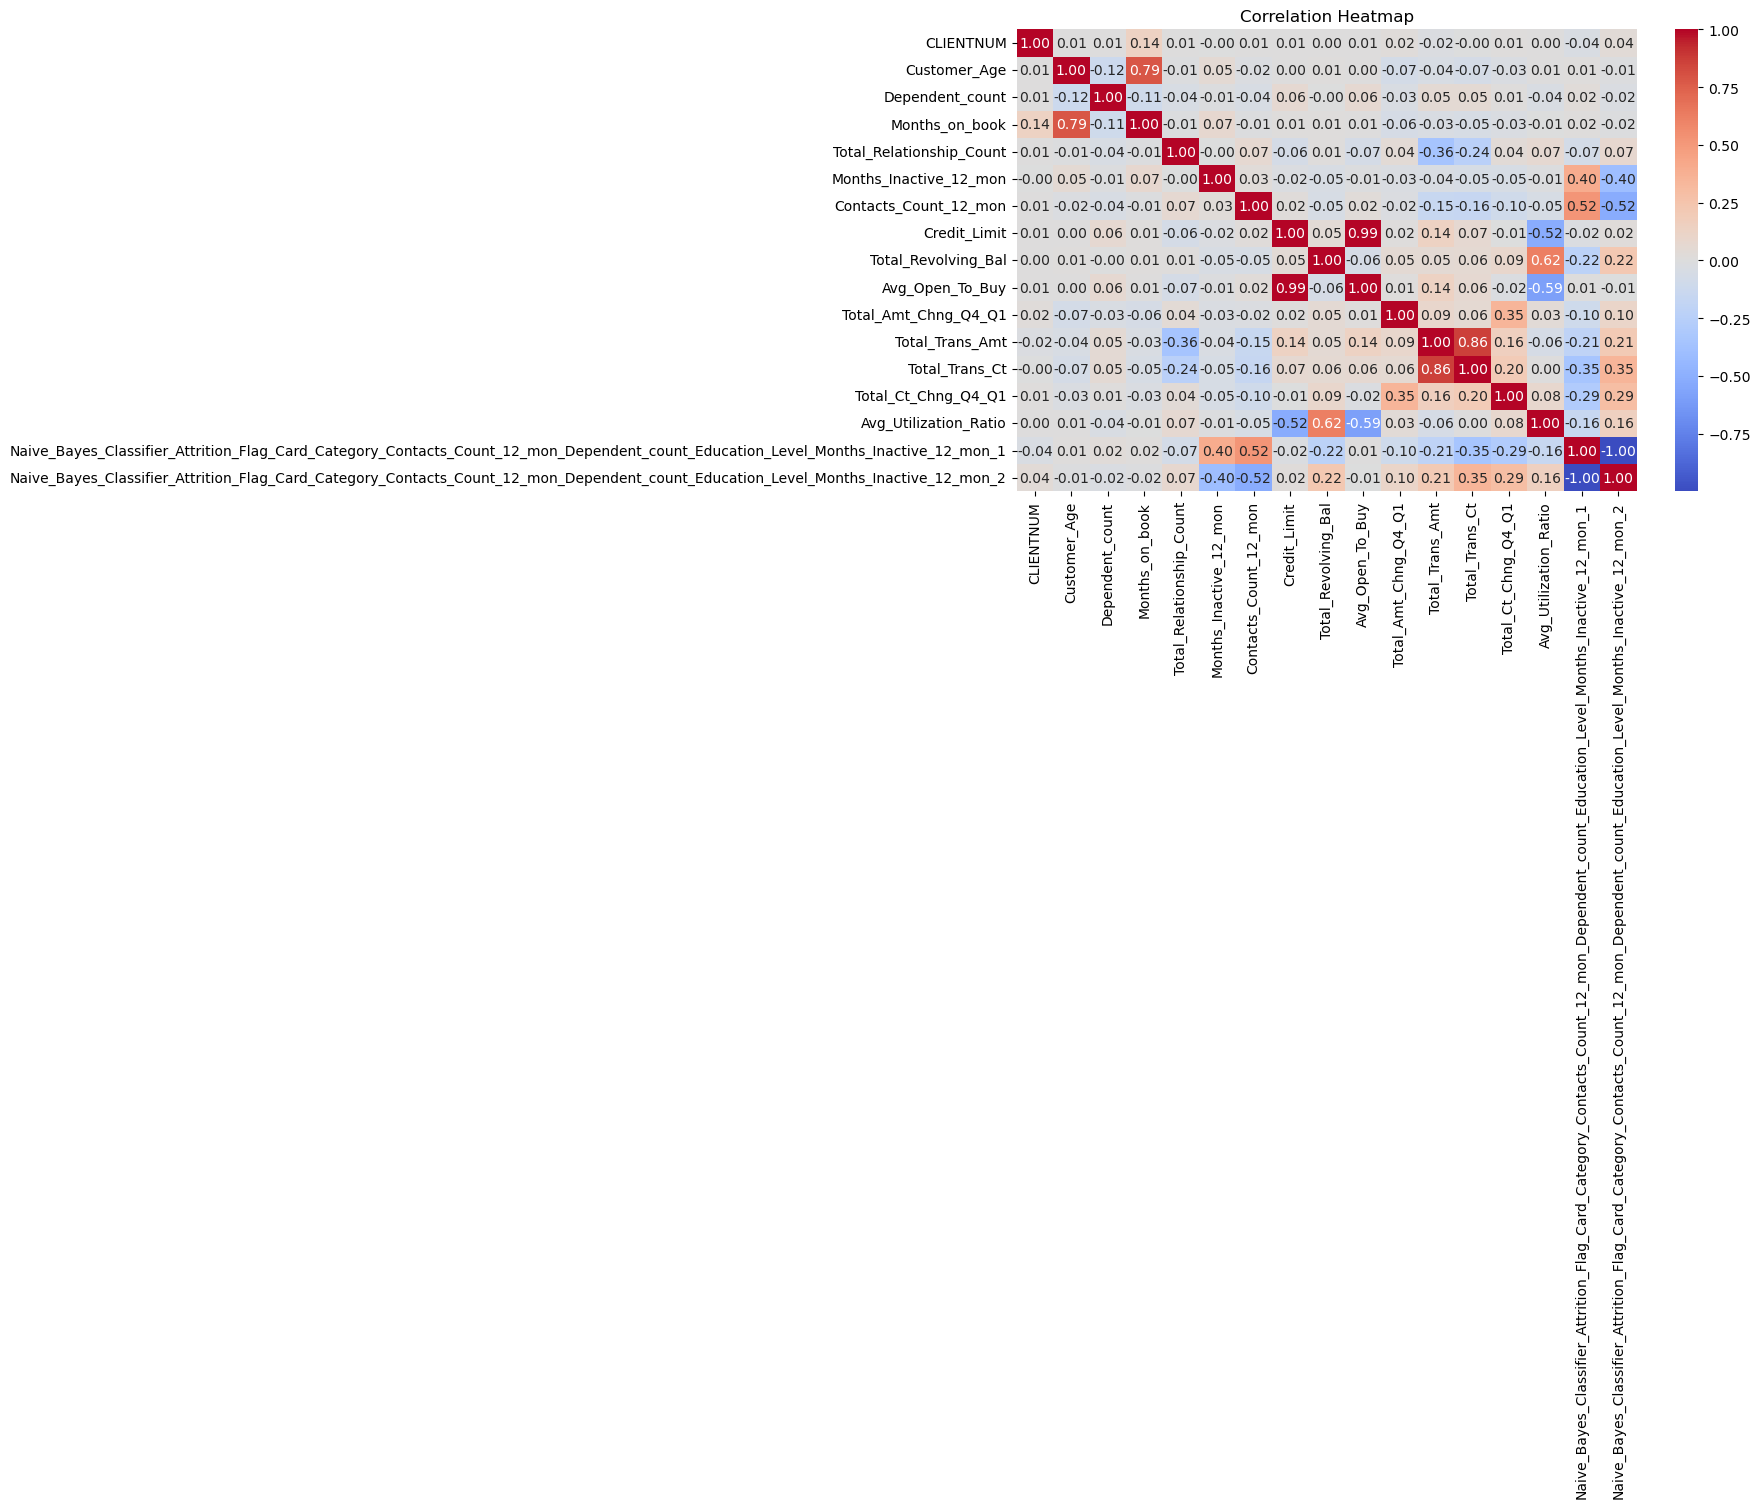

In [34]:
#3.correlation heatmap
# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



In [27]:
#1. missing values for each column
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


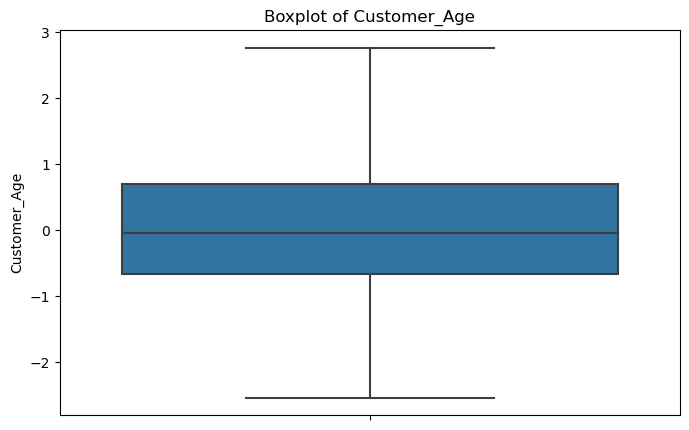

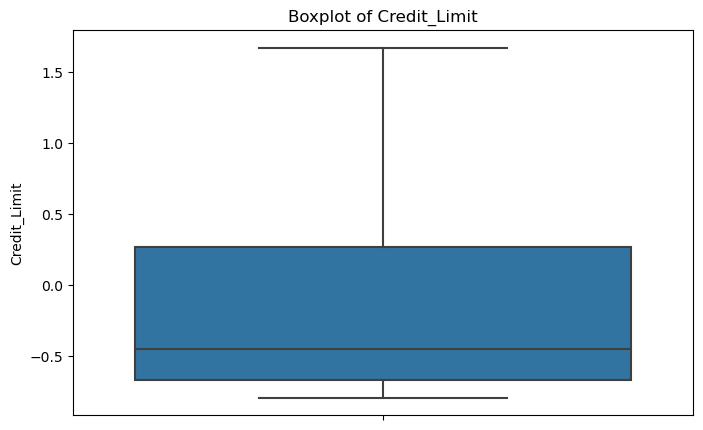

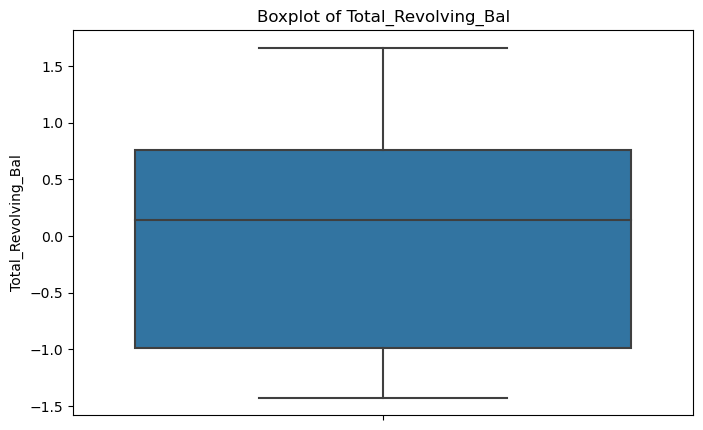

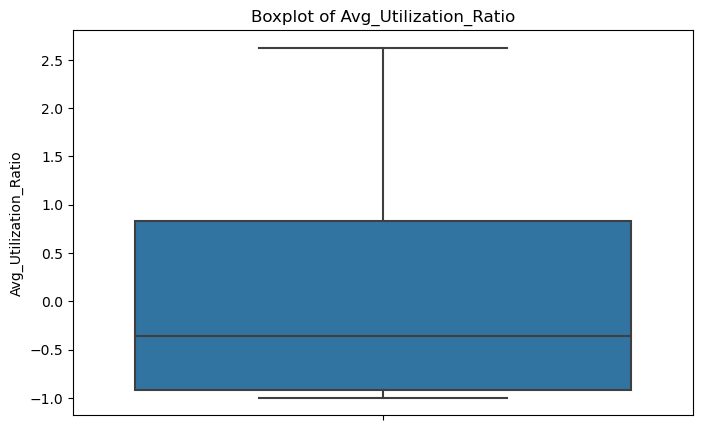

In [33]:
#2.identifying outliers

numerical_features = ['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio'] # Adjust based on your dataset

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, y=feature)
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [28]:
#3.check for dataset balance
# Assuming 'Attrition_Flag' is  target variable
balance_check = df['Attrition_Flag'].value_counts(normalize=True) * 100
print(balance_check)


Attrition_Flag
Existing Customer    83.934038
Attrited Customer    16.065962
Name: proportion, dtype: float64


##### 4. Data Cleaning (Python):
- Remove any irrelevant data.
- Handle missing data by either removing or imputing.
- Handle any outliers in the data.


Complete tasks below:

    1. Handling missing values
    2. Creating the dummy variables for all the categorical features
    3. Normalizing the data

Some more questions to keep in mind:

    Remove any irrelevant data.
    Handle missing data by either removing or imputing.
    andle any outliers in the data.

In [76]:
# 1. Remove rows with missing values
# df.dropna(inplace=True)

# Numerical
imputer_num = SimpleImputer(strategy='median')  # Or mean
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

# Categorical
imputer_cat = SimpleImputer(strategy='most_frequent')
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])


In [30]:
# 2. Creating the dummy variables for all the categorical features

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [31]:
# 3. Normalizing the data
# from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [32]:
#Handling ourliers
# Capping outliers using the Interquartile Range (IQR)
for column in numerical_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)


In [ ]:
#Dropping a non-relevant column
# df.drop(['Irrelevant_Column'], axis=1, inplace=True)


##### 5. Creating New Features and Feature Selection (Python + Domain knowledge):
- Create new features from the existing data.
- Perform feature selection to identify the most relevant features for the model.

##### 6. Data Transformation (Python + Domain knowledge):
- Perform any necessary transformations on the data, such as normalization, standardization or log transformations.

In [49]:
#from sklearn.feature_selection import SelectKBest, f_classif
# Creating a new feature-- credit Utilization Ratio
df['Credit_Utilization_Ratio'] = df['Total_Revolving_Bal'] / df['Credit_Limit']

# Correctly specifying the target variable
X = df.drop('Attrition_Flag_Existing Customer', axis=1)  # Dropping the actual target column
y = df['Attrition_Flag_Existing Customer']  # The target variable

# Apply SelectKBest to extract top k features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X, y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization
featureScores = pd.concat([df_columns, df_scores], axis=1)
featureScores.columns = ['Feature', 'Score']  # Naming the dataframe columns
print(featureScores.nlargest(10, 'Score'))  # Print 10 best features


# The result shows the scores for the top 10 features in predicting the target variable,
# based on the ANOVA F-value between each feature and the targe
# High scores indicate a strong relationship with the target
# The first two features appear to be part of a Naive Bayes Classifier and have significantly higher scores, suggesting a strong predictive power.

                                              Feature         Score
16  Naive_Bayes_Classifier_Attrition_Flag_Card_Cat...  24035.783801
15  Naive_Bayes_Classifier_Attrition_Flag_Card_Cat...  23657.177127
12                                     Total_Trans_Ct   1620.330555
13                                Total_Ct_Chng_Q4_Q1   1214.257780
8                                 Total_Revolving_Bal    752.702408
6                               Contacts_Count_12_mon    384.151444
11                                    Total_Trans_Amt    337.970460
14                              Avg_Utilization_Ratio    332.876795
5                              Months_Inactive_12_mon    290.511689
4                            Total_Relationship_Count    233.072886


In [50]:
# For data transformation, normalization or standardization can be applied using scikit-learn:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df[numerical_features])  # assuming numerical_features is a list of your numerical columns

# Normalization
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df[numerical_features])


In [74]:


# Applying log transformation
df['log_feature'] = np.log1p(df['numerical_feature'])  # Using log1p to handle zero values in the data

# This code adds a new column to  data where each value is the natural logarithm of the values in an existing column, incremented by 1 
# The np.log1p function is used instead of np.log to avoid issues with zero values, as log(0) is undefined 


KeyError: 'numerical_feature'

##### 7. Building Basic Model (ML + Python):
- Build a basic Logistic Regression model on the dataset.
- Evaluate the performance of the model using evaluation metrics such as accuracy, precision, recall, and F1-score.


Complete tasks below:

    1. Split the data
    2. Use the Logistic Regression Model
    3. Visualize prediction 


In [63]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature set and 'y' is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit on training set only
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to test set
X_test_scaled = scaler.transform(X_test)

# Now, create and train your logistic regression model with scaled data
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1 Score:", f1_score(y_test, predictions))


Accuracy: 0.9062191510365252
Precision: 0.9260304912478825
Recall: 0.9652736904061212
F1 Score: 0.9452449567723342


In [57]:
#calculate mtrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='binary')  # Adjust 'average' for multi-class
recall = recall_score(y_test, predictions, average='binary')  # Adjust 'average' for multi-class
f1 = f1_score(y_test, predictions, average='binary')  # Adjust 'average' for multi-class

# Accuracy: Overall correctness
# Precision: Correct positive predictions among all positive predictions made
# Recall: Correct positive predictions among all actual positives
# F1 Score: Balance between precision and recall

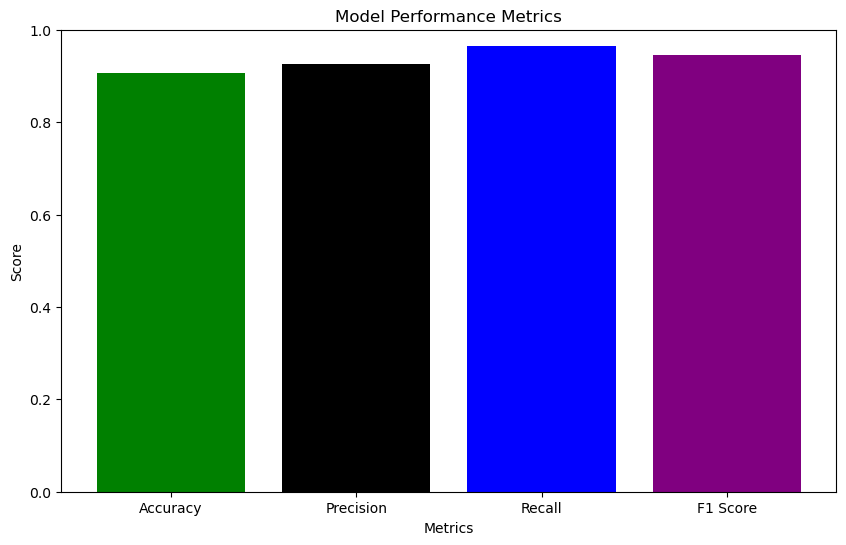

In [61]:
metrics = {
    'Accuracy': 0.9062191510365252,
    'Precision': 0.9260304912478825,
    'Recall': 0.9652736904061212,
    'F1 Score': 0.9452449567723342
}

# Create bar chart-- help visualize and display and compare the frequency, count, or other metrics across different categories.
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color=['green', 'black', 'blue', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.ylim(0, 1)  # Assuming your metric scores are between 0 and 1
plt.show()

In [62]:
#prediction model used

#decision tree----for classification or regression tasks, predicting outcomes based on data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree model
decision_tree = DecisionTreeClassifier()

# Training the model
decision_tree.fit(X_train, y_train)

# Making predictions
predictions = decision_tree.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1 Score:", f1_score(y_test, predictions))


Accuracy: 0.9950641658440277
Precision: 0.9964726631393298
Recall: 0.9976456739258387
F1 Score: 0.9970588235294118


In [77]:
# Train a decision tree classifier using the top 10 features
top_features = featureScores.nlargest(10, 'Score')['Feature'].tolist()
X_top = X[top_features]  # Selecting only the top features


In [78]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

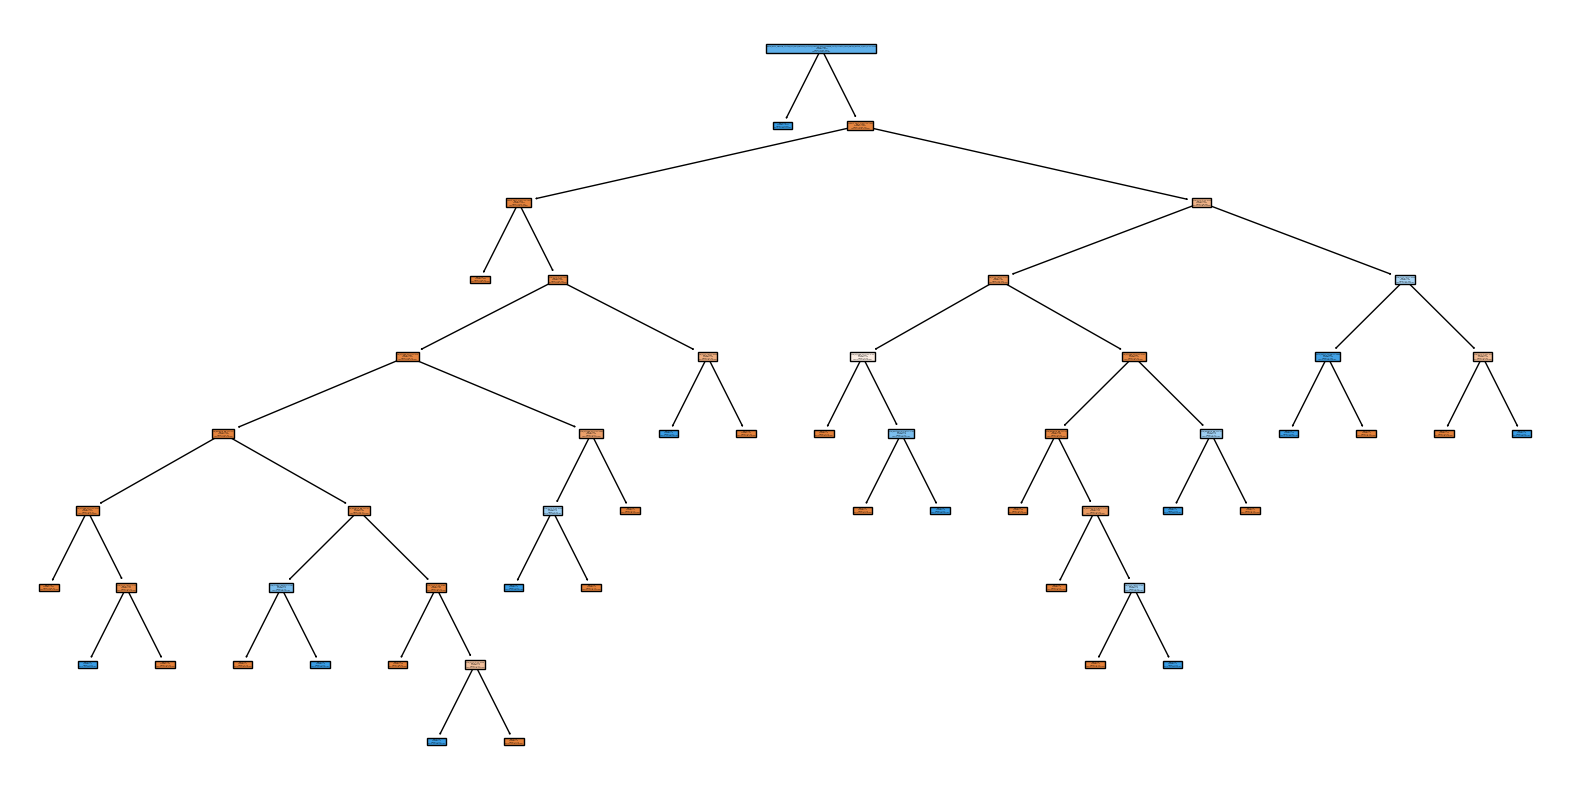

In [79]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=top_features, class_names=['Existing Customer', 'Attrited Customer'])
plt.show()